## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read CSV file into DataFrame
twitter_data = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
import os
# Make directory if it doesn't already exist
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Get the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# Write content of url to a file
file_name = 'image_predictions.tsv'
with open(file_name, mode = 'wb')as file:
    file.write(response.content)

In [6]:
# Read TSV file into DataFrame
image_predictions = pd.read_csv('image_predictions.tsv', sep ='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# Extract data from tweet-json.txt
import json
with open('tweet-json.txt') as file:
    tweet_data = []
    for line in file:
        tweet_data.append(json.loads(line))

In [8]:
# Read file line by line
tweet_data

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [9]:
# Create DataFrame with tweet ID, retweet count and favorite count.
extra_data = pd.DataFrame(tweet_data)[['id', 'retweet_count', 'favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
twitter_data

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [11]:
image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [12]:
extra_data

id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
5     891087950875897856           3261           20562
6     890971913173991426           2158           12041
7     890729181411237888          16716           56848
8     890609185150312448           4429           28226
9     890240255349198849           7711           32467
10    890006608113172480           7624           31166
11    889880896479866881           5156           28268
12    889665388333682689           8538           38818
13    889638837579907072           4735           27672
14    889531135344209921           2321           15359
15    889278841981685760           5637           25652
16    888917238123831296           4709           29611
17    888804989199671297           4559           26080
18    888554962724278272           3732           20290
19    888078434458587136           3653           22201
20    887705289381826560           5609           30779
21    887517139158093824          12082           46959
22    887473957103951883          18781           69871
23    887343217045368832          10737           34222
24    887101392804085760           6167           31061
25    886983233522544640           8084           35859
26    886736880519319552           3443           12306
27    886680336477933568           4610           22798
28    886366144734445568           3316           21524
29    886267009285017600              4             117
...                  ...            ...             ...
2324  666411507551481857            339             459
2325  666407126856765440             44             113
2326  666396247373291520             92             172
2327  666373753744588802            100             194
2328  666362758909284353            595             804
2329  666353288456101888             77             229
2330  666345417576210432            146             307
2331  666337882303524864             96             204
2332  666293911632134144            368             522
2333  666287406224695296             71             152
2334  666273097616637952             82             184
2335  666268910803644416             37             108
2336  666104133288665088           6871           14765
2337  666102155909144576             16              81
2338  666099513787052032             73             164
2339  666094000022159362             79             169
2340  666082916733198337             47             121
2341  666073100786774016            174             335
2342  666071193221509120             67             154
2343  666063827256086533            232             496
2344  666058600524156928             61             115
2345  666057090499244032            146             304
2346  666055525042405380            261             448
2347  666051853826850816            879            1253
2348  666050758794694657             60             136
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [13]:
twitter_data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [14]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [15]:
extra_data.head()

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [16]:
twitter_data.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [17]:
image_predictions.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [18]:
extra_data.tail()

id  retweet_count  favorite_count
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

In [19]:
twitter_data.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
460   817777686764523521                    NaN                  NaN   
1704  680889648562991104                    NaN                  NaN   
2013  672231046314901505                    NaN                  NaN   
553   804026241225523202                    NaN                  NaN   
1532  690005060500217858                    NaN                  NaN   

                      timestamp  \
460   2017-01-07 16:59:28 +0000   
1704  2015-12-26 23:15:17 +0000   
2013  2015-12-03 01:49:05 +0000   
553   2016-11-30 18:16:08 +0000   
1532  2016-01-21 02:56:40 +0000   

                                                 source  \
460   <a href="http://twitter.com/download/iphone" r...   
1704  <a href="http://twitter.com/download/iphone" r...   
2013  <a href="http://twitter.com/download/iphone" r...   
553   <a href="http://twitter.com/download/iphone" r...   
1532  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
460   This is Dido. She's playing the lead role in "...                  NaN   
1704  This is Cheesy. It's her birthday. She's patie...                  NaN   
2013  Exotic underwater dog here. Very shy. Wont ret...                  NaN   
553   This is Bo. He's going to make me cry. 13/10 p...                  NaN   
1532  "I'm the only one that ever does anything in t...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
460                        NaN                        NaN   
1704                       NaN                        NaN   
2013                       NaN                        NaN   
553                        NaN                        NaN   
1532                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
460   https://twitter.com/dog_rates/status/817777686...                13   
1704  https://twitter.com/dog_rates/status/680889648...                 9   
2013  https://twitter.com/dog_rates/status/672231046...                 5   
553   https://twitter.com/dog_rates/status/804026241...                13   
1532  https://twitter.com/dog_rates/status/690005060...                10   

      rating_denominator    name  doggo floofer  pupper puppo  
460                   10    Dido  doggo    None  pupper  None  
1704                  10  Cheesy   None    None    None  None  
2013                  10    None   None    None    None  None  
553                   10      Bo   None    None    None  None  
1532                  10    None   None    None    None  None

In [20]:
image_predictions.sample(5)

tweet_id                                          jpg_url  \
349  672482722825261057  https://pbs.twimg.com/media/CVUjd14W4AE8tvO.jpg   
527  676617503762681856  https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg   
414  674008982932058114  https://pbs.twimg.com/media/CVqPkVoU4AAkXA7.jpg   
389  673359818736984064  https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg   
935  703407252292673536  https://pbs.twimg.com/media/CcMBJODUsAI5-A9.jpg   

     img_num                           p1   p1_conf  p1_dog                p2  \
349        1  West_Highland_white_terrier  0.586173    True            borzoi   
527        1                    Chihuahua  0.841084    True        Pomeranian   
414        1                jigsaw_puzzle  0.970810   False        prayer_rug   
389        1               English_setter  0.696568    True  Brittany_spaniel   
935        1                      doormat  0.201058   False         turnstile   

      p2_conf  p2_dog              p3   p3_conf  p3_dog  
349  0.206620    True  Great_Pyrenees  0.060653    True  
527  0.120530    True        Pekinese  0.006600    True  
414  0.011048   False           quill  0.008432   False  
389  0.104046    True    Ibizan_hound  0.034832    True  
935  0.088583   False          carton  0.082924   False

In [21]:
extra_data.sample(5)

id  retweet_count  favorite_count
830   768596291618299904           1473            5592
1389  700143752053182464           3129            8282
319   834458053273591808           1899           10512
2054  671357843010908160            157             426
1072  739844404073074688            966            4138

In [22]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [25]:
twitter_data.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [26]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [27]:
extra_data.describe()

id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

In [28]:
list(twitter_data)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [29]:
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [30]:
list(extra_data)

['id', 'retweet_count', 'favorite_count']

In [31]:
all_columns = pd.Series(list(twitter_data)+list(image_predictions)+list(extra_data))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [32]:
twitter_data.rating_numerator.sort_values

<bound method Series.sort_values of 0       13
1       13
2       12
3       13
4       12
5       13
6       13
7       13
8       13
9       14
10      13
11      13
12      13
13      12
14      13
15      13
16      12
17      13
18      13
19      13
20      12
21      13
22      14
23      13
24      13
25      12
26      13
27      13
28      13
29      12
        ..
2326     2
2327     7
2328     9
2329    11
2330     6
2331     8
2332    10
2333     9
2334     3
2335     1
2336    11
2337    10
2338     1
2339    11
2340     8
2341     9
2342     6
2343    10
2344     9
2345    10
2346     8
2347     9
2348    10
2349     2
2350    10
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64>

In [33]:
twitter_data.rating_denominator.sort_values

<bound method Series.sort_values of 0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
        ..
2326    10
2327    10
2328    10
2329    10
2330    10
2331    10
2332    10
2333    10
2334    10
2335     2
2336    10
2337    10
2338    10
2339    10
2340    10
2341    10
2342    10
2343    10
2344    10
2345    10
2346    10
2347    10
2348    10
2349    10
2350    10
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64>

In [34]:
twitter_data[twitter_data['rating_denominator'] <= 9]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17           26259576.0   
516   810984652412424192                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
516   2016-12-19 23:06:23 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
313   @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...                  NaN   
2335  This is an Albanian 3 1/2 legged  Episcopalian...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
313                        NaN                        NaN   
516                        NaN                        NaN   
2335                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
313                                                 NaN               960   
516   https://www.gofundme.com/sams-smile,https://tw...                24   
2335  https://twitter.com/dog_rates/status/666287406...                 1   

      rating_denominator  name doggo floofer pupper puppo  
313                    0  None  None    None   None  None  
516                    7   Sam  None    None   None  None  
2335                   2    an  None    None   None  None

In [35]:
twitter_data[twitter_data.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [36]:
extra_data[extra_data.id.duplicated()]

Empty DataFrame
Columns: [id, retweet_count, favorite_count]
Index: []

In [37]:
twitter_data.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
Buddy          7
Bailey         7
an             7
Daisy          7
Bella          6
Jax            6
Jack           6
Milo           6
Dave           6
Oscar          6
Leo            6
Scout          6
Stanley        6
Rusty          6
Koda           6
Phil           5
            ... 
Maxwell        1
Bronte         1
Cermet         1
Perry          1
Craig          1
Kobe           1
Jim            1
Wishes         1
Jeffrie        1
Devón          1
Alf            1
Lacy           1
Philippe       1
Sprout         1
Mairi          1
Brooks         1
Lipton         1
Marlee         1
Andru          1
Tebow          1
Remy           1
Sweet          1
Dug            1
Jarvis         1
Blu            1
Vinnie         1
Kody           1
Chloe         

In [38]:
twitter_data.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [39]:
twitter_data.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [40]:
twitter_data.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [41]:
twitter_data.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [42]:
sum(image_predictions.img_num.isnull())

0

In [43]:
sum(image_predictions.p1.isnull())

0

In [44]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [45]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
toy_terrier                        20
Samoyed                            20
chow                               20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [46]:
image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

### Quality issues

#### twitter_data table
1. Rating denominator has values less than 10

2. Erroneous datatypes (timestamp)

3. Missing data records (in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns)

4. Phrase names in the name colum (a, an, None, Such, the)

5. Non descriptive name and mispelled column headers

6. None in the doggo, floofer, pupper and puppo column data

7. No total rating column

#### image_predictions table

8. Non descriptive name and mispelled column headers


### Tidiness issues
#### twitter_data table
9. Extra_data table should be part of the twitter_data table

10. Unwanted data columns for analysis

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [47]:
# Make copies of original pieces of data
twitter_data_clean = twitter_data.copy()
image_predictions_clean = image_predictions.copy()
extra_data_clean = extra_data.copy()

#### twitter_data 

### Issue #1: Rating denominator has values less than 10

#### Define
Replace denominator values that have a value less than 10 with 10

#### Code

In [48]:
twitter_data_clean.rating_denominator = twitter_data_clean.rating_denominator.replace([0,2,7], 10)

#### Test

In [49]:
#Should be empty
twitter_data_clean[twitter_data_clean.rating_denominator <= 9]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #2: Erroneous datatypes (timestamp)

#### Define
Convert datatypes (timestamp) to datatype integer

#### Code

In [50]:
# To datatime
twitter_data_clean.timestamp = pd.to_datetime(twitter_data_clean.timestamp)

#### Test

In [51]:
#Timestamp should be in datetime
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #3:  Missing data records (in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns)

#### Define: 
Drop in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns

#### Code

In [52]:
#Note: axis = 1 denotes that we are referring to a column not a row
twitter_data_clean = twitter_data_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], axis =1)

#### Test

In [53]:
#Confirm that the columns are gone
list(twitter_data_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #4: Phrase in names

#### Define: 
Drop rows containing phrase as names in the name column

#### Code

In [54]:
#define list of values for which name column has value my, a, an, None, Such,the and O
values= ['my','a','an','None','Such','the', 'O']

#drop any rows that have the listed values in the name column
twitter_data_clean = twitter_data_clean[twitter_data_clean.name.isin(values) == False]

#### Test

In [55]:
#Confirm if the phrase names have been removed
twitter_data_clean.name.value_counts()

Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
Bailey        7
Buddy         7
Toby          7
Daisy         7
Koda          6
Bella         6
Jack          6
Dave          6
Scout         6
Leo           6
Rusty         6
Milo          6
Stanley       6
Jax           6
Oscar         6
Sunny         5
Bentley       5
George        5
very          5
Oakley        5
             ..
Cermet        1
Perry         1
Craig         1
JD            1
Geoff         1
Rorie         1
Kobe          1
Alf           1
Remy          1
Lacy          1
Philippe      1
Sprout        1
Mairi         1
Brooks        1
Lipton        1
Marlee        1
Jeffrie       1
Andru         1
Sweet         1
Jim           1
Dug           1
Jarvis        1
Blu           1
Vinnie        1
Kody          1
Chloe         1
Alexander     1
Tebow         1
Wishes        1
Mark          1
Name: name, Length: 951,

In [56]:
# Check if the corresponding rows have also been dropped
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 2326
Data columns (total 11 columns):
tweet_id              1539 non-null int64
timestamp             1539 non-null datetime64[ns]
source                1539 non-null object
text                  1539 non-null object
rating_numerator      1539 non-null int64
rating_denominator    1539 non-null int64
name                  1539 non-null object
doggo                 1539 non-null object
floofer               1539 non-null object
pupper                1539 non-null object
puppo                 1539 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 144.3+ KB


### Issue #5: Non descriptive and mispelled name columns

#### Define: 
Capitalize the first letter of each column headers

#### Code

In [57]:
twitter_data_clean = twitter_data_clean.rename(columns={'tweet_id':'Tweet_id','timestamp':'Timestamp','source':'Source','text':'Text','rating_numerator':'Rating_numerator','rating_denominator':'Rating_denominator','name':'Name','doggo':'Doggo','floofer':'Floofer','pupper':'Pupper','puppo':'Puppo'})

#### Test

In [58]:
twitter_data_clean.head()

Tweet_id           Timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              Source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                Text  Rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   Rating_denominator      Name Doggo Floofer Pupper Puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Issue #6: None in the doggo, floofer, pupper, puppo column

#### Define: 
Replace the None values in the doggo, floofer, pupper, puppo column with NaN

#### Code

In [59]:
twitter_data_clean[['Doggo','Floofer','Pupper','Puppo']] = twitter_data_clean[['Doggo','Floofer','Pupper','Puppo']].replace('None','NaN')

#### Test

In [60]:
# Confirm if None values have been replaced with NaN
twitter_data_clean.head()

Tweet_id           Timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              Source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                Text  Rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   Rating_denominator      Name Doggo Floofer Pupper Puppo  
0                  10   Phineas   NaN     NaN    NaN   NaN  
1                  10     Tilly   NaN     NaN    NaN   NaN  
2                  10    Archie   NaN     NaN    NaN   NaN  
3                  10     Darla   NaN     NaN    NaN   NaN  
4                  10  Franklin   NaN     NaN    NaN   NaN

In [61]:
# Confirm all None values have been replaced with NaN
twitter_data_clean.Doggo.value_counts()

NaN      1486
doggo      53
Name: Doggo, dtype: int64

### Issue #7: No total rating column

#### Define
Calculate the total rating and create a new column in the twitter_data table for the values of the total rating

#### Code

In [62]:
#Create a new column and populate the column with the values of the total rating
twitter_data_clean['Rating_total'] =twitter_data_clean['Rating_numerator'] / twitter_data_clean['Rating_denominator']

#### Test

In [63]:
# Confirm the creation of the total rating column
twitter_data_clean.head()

Tweet_id           Timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              Source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                Text  Rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   Rating_denominator      Name Doggo Floofer Pupper Puppo  Rating_total  
0                  10   Phineas   NaN     NaN    NaN   NaN           1.3  
1                  10     Tilly   NaN     NaN    NaN   NaN           1.3  
2                  10    Archie   NaN     NaN    NaN   NaN           1.2  
3                  10     Darla   NaN     NaN    NaN   NaN           1.3  
4                  10  Franklin   NaN     NaN    NaN   NaN           1.2

#### image_predictions table

### Issue #8: Non descriptive name and mispelled column headers

#### Define: 
Select all column headers and replace them

#### Code

In [64]:
image_predictions_clean = image_predictions_clean.rename(columns={'tweet_id':'Tweet_id','img_num':'Image_number'})

#### Test

In [65]:
image_predictions_clean.head()

Tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   Image_number                      p1   p1_conf  p1_dog                  p2  \
0             1  Welsh_springer_spaniel  0.465074    True              collie   
1             1                 redbone  0.506826    True  miniature_pinscher   
2             1         German_shepherd  0.596461    True            malinois   
3             1     Rhodesian_ridgeback  0.408143    True             redbone   
4             1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

#### Tidiness

#### twitter_data_table

### Issue #9: extra_data table should be part of the twitter_data table

#### Define
Import the extra_data_clean table and merge it with the twitter_data_clean

#### Code

In [66]:
#Rename column named
extra_data_clean = extra_data_clean.rename(columns={'id':'Tweet_id','retweet_count':'Retweet_count','favorite_count':'Favorite_count'})

In [67]:
#Check column names
extra_data_clean.head()

Tweet_id  Retweet_count  Favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [68]:
#Merge the two dataframes
twitter_data_clean = pd.merge(twitter_data_clean, extra_data_clean,on= 'Tweet_id')

#### Test

In [69]:
#Check if the two dataframes have been merged into one
twitter_data_clean.head()

Tweet_id           Timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              Source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                Text  Rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   
3  This is Darla. She commenced a snooze mid meal...                13   
4  This is Franklin. He would like you to stop ca...                12   

   Rating_denominator      Name Doggo Floofer Pupper Puppo  Rating_total  \
0                  10   Phineas   NaN     NaN    NaN   NaN           1.3   
1                  10     Tilly   NaN     NaN    NaN   NaN           1.3   
2                  10    Archie   NaN     NaN    NaN   NaN           1.2   
3                  10     Darla   NaN     NaN    NaN   NaN           1.3   
4                  10  Franklin   NaN     NaN    NaN   NaN           1.2   

   Retweet_count  Favorite_count  
0           8853           39467  
1           6514           33819  
2           4328           25461  
3           8964           42908  
4           9774           41048

In [70]:
#Check if there are no duplicates of the Tweet_id values
twitter_data_clean.query('Tweet_id==892420643555336193')

Tweet_id           Timestamp  \
0  892420643555336193 2017-08-01 16:23:56   

                                              Source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                Text  Rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   

   Rating_denominator     Name Doggo Floofer Pupper Puppo  Rating_total  \
0                  10  Phineas   NaN     NaN    NaN   NaN           1.3   

   Retweet_count  Favorite_count  
0           8853           39467

### Issue #10: Unwanted data columns

#### Define: Drop unwanted data columns (Timestamp, Source, Text) from the dataframe

#### Code

In [71]:
#Note: axis=1 denotes that we are referring to a column not a row
twitter_data_clean = twitter_data_clean.drop(['Timestamp','Source','Text'],axis=1)

#### Test

In [72]:
twitter_data_clean.head()

Tweet_id  Rating_numerator  Rating_denominator      Name Doggo  \
0  892420643555336193                13                  10   Phineas   NaN   
1  892177421306343426                13                  10     Tilly   NaN   
2  891815181378084864                12                  10    Archie   NaN   
3  891689557279858688                13                  10     Darla   NaN   
4  891327558926688256                12                  10  Franklin   NaN   

  Floofer Pupper Puppo  Rating_total  Retweet_count  Favorite_count  
0     NaN    NaN   NaN           1.3           8853           39467  
1     NaN    NaN   NaN           1.3           6514           33819  
2     NaN    NaN   NaN           1.2           4328           25461  
3     NaN    NaN   NaN           1.3           8964           42908  
4     NaN    NaN   NaN           1.2           9774           41048

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
twitter_data_clean.to_csv('twitter_archive_master', sep='\t')
image_predictions_clean.to_csv('image_archive_master', sep='\t')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

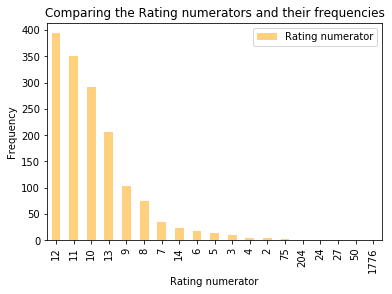

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

twitter_data_clean.Rating_numerator.value_counts().plot(kind = 'bar', alpha = 0.5, color= 'orange', label = 'Rating numerator')
plt.legend()
plt.title('Comparing the Rating numerators and their frequencies')
plt.xlabel('Rating numerator')
plt.ylabel('Frequency');



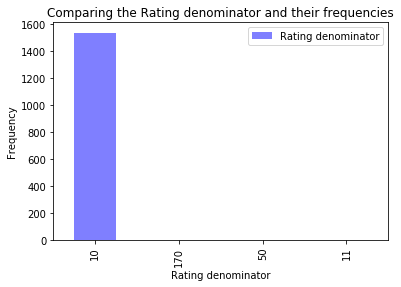

In [75]:
twitter_data_clean.Rating_denominator.value_counts().plot(kind = 'bar', alpha = 0.5, color= 'blue', label = 'Rating denominator')
plt.legend()
plt.title('Comparing the Rating denominator and their frequencies')
plt.xlabel('Rating denominator')
plt.ylabel('Frequency');


In [76]:
numerator = twitter_data_clean['Rating_numerator'].count()
denominator = twitter_data_clean['Rating_denominator'].count()
#Percentage of rating
numerator/denominator

1.0

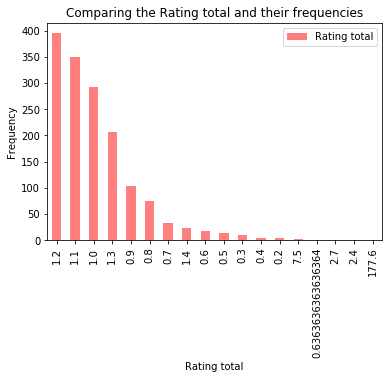

In [77]:
twitter_data_clean.Rating_total.value_counts().plot(kind = 'bar', alpha = 0.5, color= 'red', label = 'Rating total')
plt.legend()
plt.title('Comparing the Rating total and their frequencies')
plt.xlabel('Rating total')
plt.ylabel('Frequency');

### Insights:
1. The Rating_numerator had a value of 75 which happens to be an outlier from the trend of values of the ratings for the numerator had a frequency value less 10. This could be as a result of a mistake.

2. The Rating_denominator of my bar graph only had a value 10 which coincidentally happens to have the highest frequency of about 1500 which clearly indicates that majority of people decided to give a rating of 10 for the dogs. This is also as a result of my cleaning the denominator values where I replaced denominator values less than 10 to 10 because I regarded the standard denominator rating to be 10.

3. The plot for the Favorite_count had a lot of outliers while the plot for the Rating_total was not as a distinct of that of the Favorite_count.

### Visualization

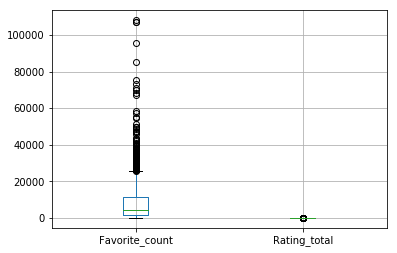

In [78]:
bp = twitter_data_clean.boxplot(column=["Favorite_count", "Rating_total"])